# Anomaly Detection and Recommender Systems

Hey there, hi there, ho there, dear reader! Today we will be implementing anomaly detection and recommender system algorithms based on Andrew Ng’s machine learning class (https://www.coursera.org/learn/machine-learning), first from scratch and then in scikit learn. Anomaly detection simply means using a Gaussian (or normal) distribution to find abnormal data points. Meanwhile, recommendor algorithms make use of the collaborative filtering algorithm and low-rank matrix factorization. Both anomaly detection and recommender systems are examples of unsupervised learning algorithms.

Anyway, let’s get started and load in our favorite data science libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

Andrew Ng:

In this exercise, you will implement an anomaly detection algorithm to detect anomalous behavior in server computers. The features measure the throughput (mb/s) and latency (ms) of response of each server. While your servers were operating, you collected m = 307 examples of how they were behaving, and thus have an unlabeled dataset $ \{x^{(1)}, ..., x^{(m)}\}$. You suspect that the vast majority of these examples are "normal" (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.

You will use a Gaussian model to detect anomalous examples in your dataset. You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions.

Okay then! Let's load up the dat an see how much trouble we're in.

In [2]:
data1 = loadmat('data/ex8data1.mat')
X1 = data1['X']
X1.shape

(307, 2)

Let's write up a plotting function. We're first just going to want to take a look at the data. After that though, we need to draw a contour plot and then finally we will need to be able to detect and visualize our outliers or abnormal data points.

In [3]:
def plotData(X, mu = np.array([0, 0]), sigma2 = 0, epsilon = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 0],X[:, 1], marker = 'x', label = "Data")
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    plt.title("Outlier detection")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/s)")
    plt.grid(True)
    
    if mu.any() != 0:
        xx, yy = np.meshgrid(np.linspace(0, 30, 100), np.linspace(0, 30, 100))
        p = gaussian(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])), mu, sigma2)
        levels = np.array(([10**i for i in np.arange(-20, 0, 3, dtype = np.float)])).T
        CS = plt.contour(xx, yy, p[:, np.newaxis].reshape(xx.shape), levels, cmap = 'PRGn_r')
        plt.clabel(CS, inline = 1, fontsize = 10)
        for i, label in enumerate(CS.cvalues):
               CS.collections[i].set_label(label)
    
    if epsilon != 0:
        pdf = gaussian(X, mu, sigma2)
        outliers = np.where(pdf < epsilon)
        plt.scatter(X[outliers[0], 0], X[outliers[0], 1], marker = "o", facecolor = "none", 
                    edgecolor = "red", s = 150, label = "Outliers")
    
    plt.legend()

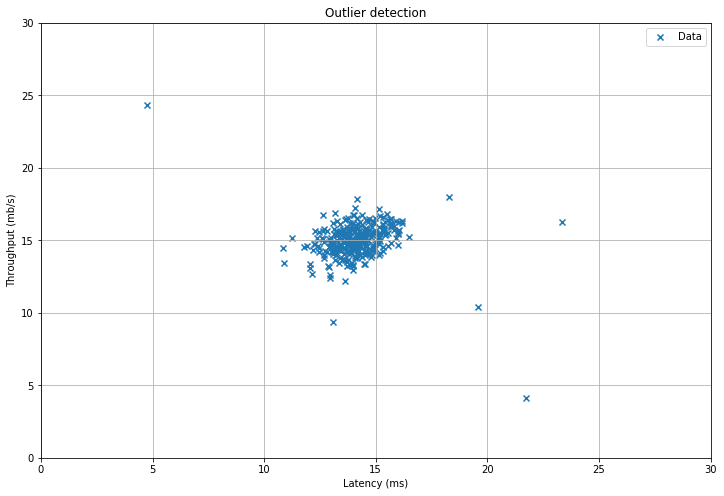

In [4]:
plotData(X1)

As you can see above, the vast majority of the data is right around the center and these would the data points we consider to be "normal". However, as Professor Ng hinted at, there do appear to be some outliers, which in this example would be servers acting weird. Time to detect some anomolies!

Given a training set $ \{x^{(1)}, ..., x^{(m)}\}$ (where $x^{(1)} \in {\rm I\!R^{n}}$) (x is a real number), we want to estimate the Gaussian distribution for each of the features $x_i$. For each feature $i = 1 ... n$, we need to find parameters $\mu_i$ (the mean) and $\sigma_i^2$ (the variance) that fit the data in the $i$-th dimension $ \{x^{(1)}, ..., x^{(m)}\}$ ($i$-th dimension of each example. The Gaussian Distribution is also known as the normal distribution, which is also known as the bell curve!

### Gaussian Distribution

We define the Gaussian Distribution as

$$p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ is the mean and is estimated by
$$\mu_i = \frac{1}{m}\sum^m_{j=1}x^{(j)}$$

while $\sigma^2$ is the variance which we estimate by using
$$\sigma^2_i = \frac{1}{m}\sum^m_{j=1}(x^{(j)} - \mu_j)^2$$

If you're curious $\sigma$ is called the standard deviation and is calculated using this equation:

$$\sigma_i = \sqrt{\frac{1}{m}\sum^m_{j=1}(x^{(j)} - \mu_j)}$$

However, we won't being the standard deviation in the exercise, but it's good to know!

Calculating the mean and variance is thankfully fairly trivial, and numpy is happy to helpout!

In [5]:
def meanVariance(X):
    mu = np.mean(X, axis = 0)
    sigma2 = np.var(X, ddof = 1, axis = 0)
        
    return mu, sigma2

In [8]:
mu, sigma2 = meanVariance(X1)
print("Mean: ", mu)
print("Variance: ", sigma2)

Mean:  [14.11222578 14.99771051]
Variance:  [1.83862041 1.71533273]


### Multivariate Gaussian Distribution

We will also need to the Multivariate Gaussian Distribution to be able to draw the contour line. This distribution is given by

$$p(x;\mu,\Sigma) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$

This is a doozy. Wish me luck.

In [9]:
def gaussian(X, mu, sigma2):
       
    sigma2 = np.diag(sigma2)
    X = X - mu.T
    
    pdf = 1/((2 * np.pi)**(len(mu) / 2) * (np.linalg.det(sigma2)**0.5)) * \
          np.exp(-0.5 * np.sum(X @ np.linalg.pinv(sigma2) * X, axis = 1))
    
    return pdf

Unless I make a mistake, we should be able to plot our contour lines now.

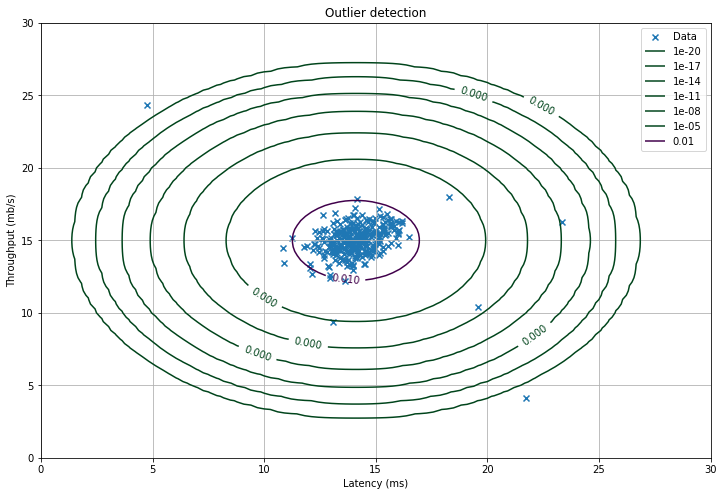

In [10]:
mu, sigma2 = meanVariance(X1)
plotData(X1, mu, sigma2)

Great! As you can see, the distribution captures the majority of the data right in the center, while there are only a few data points outside the purple contour, which represents higher probability. The other points occur with such low probabilty that the contour descriminator has pushed it basically to zero, denoted by green contours.

Let's load up the validation data which we will use to evaluation our model using metrics.

In [15]:
Xval1 = data1['Xval']
yval1 = data1['yval']

Xval1.shape, yval1.shape

((307, 2), (307, 1))

### Selecting the threshold  $\epsilon$
One way to determine which examples are anomalies is to select a threshold based on a cross validation set.  Now we can implement an algorithm to select the threshold $\epsilon$ using the $F1$ score on a cross validation set. For this, we
will use a cross validation set $\{(x^{(1)}_{cv}, y^{(1)}_{cv}), ..., (x^{(m_{cv})}_{cv}, y^{(m_{cv})}_{cv})\}$ where the label $y = 1$ corresponds to an anomalous example, and $y = 0$ corresponds to a normal example. For each cross validation example, we will compute $p(x^{(i)}_{cv})$. We can then pass a vector of all of these probabilities $p(x^{(i)}_{cv}, ..., p(x^{(m_{cv})}_{cv})$ to selectThreshold as the vector pval. The corresponding labels $y^{(1)}_{cv}, ..., y^{(m_{cv})}_{cv}$ will then also be passed to selectThreshold as the vector yval.

We want this function to return two values. This first value is $\epsilon$, the threshold. If some $x$ has a low probabilty ($p(x) < \epsilon$), then we'll say it's an anomaly. The second value we want to return if the $F1$ score. We compute this score by first computing precision and recall. 

$$ precision = \frac{tp}{tp+fp}$$

$$ recall = \frac{tp}{tp+fn}$$

$tp$ is the number of true positives: the ground truth label says it's an anomaly and our algorithm correctly classified it as an anomaly.

$fp$ is the number of false positives: the ground truth label says it's not an anomaly, but our algorithm incorrectly classified it as an anomaly.

$fn$ is the number of false negatives: the ground truth label says it's an anomaly, but our algorithm incorrectly classified it as not being anomalous.

We can then compute $F1$, which is also called the harmonic mean of precision and recall.

$$ F1 = \frac{2 \cdot precision\cdot recall}{precision+ recall}$$

That was a mouthful! Here we go.

In [13]:
def selectThreshold(pval, yval):
    best_epi = 0; best_f1 = 0
    
    step = (max(pval) - min(pval)) / 1000
    for epi in np.arange(pval.min(), pval.max(), step):
        preds = (pval < epi)[:, np.newaxis]
        tp = np.sum(preds[yval == 1] == 1)
        fp = np.sum(preds[yval == 0] == 1)
        fn = np.sum(preds[yval == 1] == 0)
        
        # compute precision, recall and F1
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        f1 = (2 * precision * recall) / (precision + recall)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epi = epi
        
    return best_epi, best_f1

In [14]:
pval = gaussian(Xval1, mu, sigma2)
epsilon, F1 = selectThreshold(pval, yval1)
print("Best epsilon: ", epsilon)
print("Best F1 on Cross Validation Set: ", F1)

Best epsilon:  8.961567687193517e-05
Best F1 on Cross Validation Set:  0.8750000000000001


C:\Users\Theochem\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


Looks good! With epsilon at hand, we can now flag those pesky outliers.

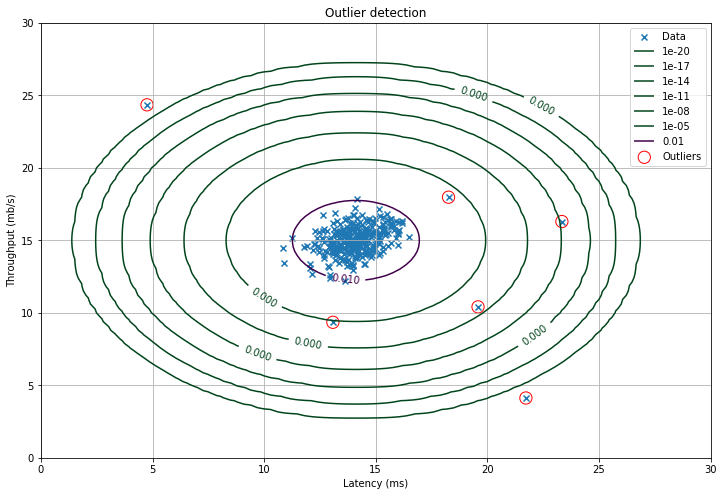

In [15]:
plotData(X1, mu, sigma2, epsilon)

Nice! Of course, scikit learn could've done this for us as well. Let me show you!

In [12]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [17]:
xx, yy = np.meshgrid(np.linspace(0, 30, 100), np.linspace(0, 30, 100))
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
y_pred = clf.decision_function(X1).ravel()
threshold = np.percentile(y_pred, 1.95)
outliers = y_pred < threshold

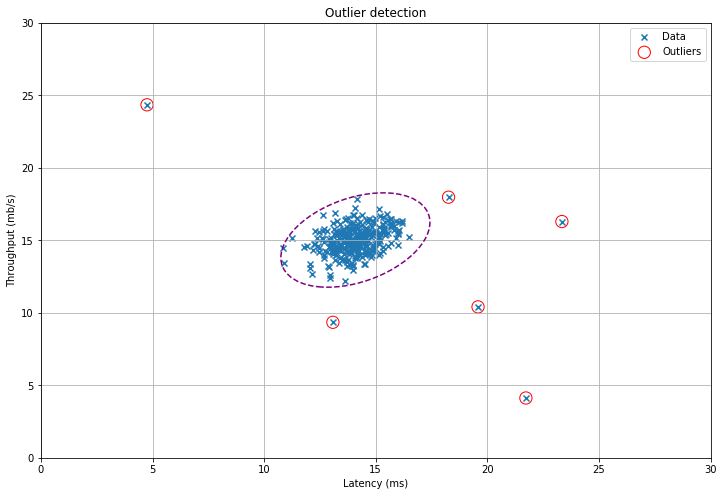

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(X1[:, 0], X1[:, 1], marker = 'x', label = "Data")
plt.scatter(X1[outliers][:, 0], X1[outliers][:, 1], marker = "o", facecolor = "none", 
                    edgecolor = "red", s = 150, label = "Outliers")
plt.contour(xx, yy, z, levels = [threshold], colors = 'purple')
plt.title("Outlier detection")
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.grid(True)
plt.legend()

We could even get the same probability fit if we were to play with the parameters for a while. However, as you can see, scikit learn found all the same outliers! Anyway, onto the second problem!

### High dimensional dataset

Let's load up our data and rerun the code to see what we get.

In [19]:
data2 = loadmat('data/ex8data2.mat')
X2 = data2['X']
Xval2 = data2["Xval"]
yval2 = data2["yval"]

In [20]:
print('X2:', X2.shape)
print('Xval2:', Xval2.shape)
print('yval2:', yval2.shape)

X2: (1000, 11)
Xval2: (100, 11)
yval2: (100, 1)


In [21]:
mu2, sigma2_2 = meanVariance(X2)
print(mu2)
print(sigma2_2)

[  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252]
[61.03592966 53.25898085 58.57403675 84.28832557 65.33392569 89.66454211
 55.6891883  87.24958742 29.65892722 70.85606126 50.55412132]


In [22]:
prob2 = gaussian(X2, mu2, sigma2_2)
pval2 = gaussian(Xval2, mu2, sigma2_2)

In [23]:
epsilon2, F1_2 = selectThreshold(pval2, yval2)
print("Best Epsilon: ", epsilon2)
print("Best F1: ", F1_2)
outliers = [X2[i] for i in np.arange(X2.shape[0]) if prob2[i] < epsilon2]
print("Number of Outliers: ", len(outliers))

Best Epsilon:  1.3716606750407378e-18
Best F1:  0.6153846153846154
Number of Outliers:  117


C:\Users\Theochem\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


Which is exactly what we were supposed to get. How cool is that? Why don't we try computing the F1 with scikit learn this time?

In [24]:
from sklearn.covariance import EllipticEnvelope
clf2 = EllipticEnvelope()
clf2.fit(X2)

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [29]:
y_pred2 = clf2.predict(Xval2)
y_pred2

array([-1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1])

In [30]:
# change scikit learn labels to match exercise's
y_pred2[y_pred2 == 1] = 0
y_pred2[y_pred2 == -1] = 1
y_pred2

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [31]:
from sklearn.metrics import precision_recall_fscore_support as score

In [32]:
precision, recall, fscore, support = score(yval2, y_pred2.ravel())

In [34]:
print("Scikit Learn's F1: {0}".format(fscore[1]*100))

Scikit Learn's F1: 57.14285714285714


Pretty similar F1s. You can get the same fit if you play around with Elliptic Envelope's default parameters, which I hope that you do! Now for the second half of this exercise!

## Recommender Systems: Collaborative Filtering

In this part of the exercise, we will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings. This dataset consists of ratings on a scale of 1 to 5. The dataset has $n_u = 943$ users, and $n_m = 1682$ movies. Loading in the data...

In [2]:
data3 = loadmat('data/ex8_movies.mat')

In [3]:
Y = data3['Y']
R = data3['R']
print('Y: ', Y.shape)
print('R: ', R.shape)

Y:  (1682, 943)
R:  (1682, 943)


Let's take a look at the average rating for the first movie in the dataset, which happens to be Toy Story.

In [4]:
print("Average rating for Toy Story: {0}/5".format(np.round(np.sum(Y[0, :] * R[0, :])/ np.sum(R[0, :]), 2)))

Average rating for Toy Story: 3.88/5


We also need to draw a really ugly picture which is not interpretable to me, but for your reference, dear reader.

Text(0.5,0,'Users (943)')

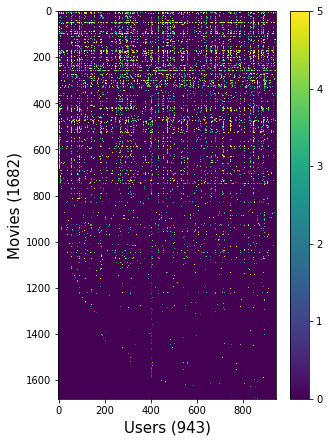

In [5]:
fig = plt.figure(figsize=(5, 4*(Y.shape[0] / Y.shape[1])))
plt.imshow(Y)
plt.colorbar()
plt.ylabel('Movies ({0})'.format(R.shape[0]), fontsize = 15)
plt.xlabel('Users ({0})'.format(R.shape[1]), fontsize = 15)

![X and Theta](pic1.png)

In [6]:
params = loadmat('data/ex8_movieParams.mat')
X3 = params['X']
Theta = params['Theta']

In [7]:
print('X3: ', X3.shape)
print('Theta: ', Theta.shape)

X3:  (1682, 10)
Theta:  (943, 10)


### Collaborative Filtering Learning Algorithm
![2](pic2.png)
![3](pic3.png)
So... the time has come to do some more intense math. We need to code up $J$ our cost function, which we define as

$$J(x^{(i)},...,x^{(n_m)},\Theta^{(I)},...,\Theta^{(n_u)}) = \frac{1}{2} \sum ((\Theta^{(j)})^Tx^{(i)} - y^{(i,j)})^2 + (\frac{\lambda}{2} \sum^{n_u}_{j=1}\sum^n_{k=1} (\Theta^{(j)}_k)^2) + (\frac{\lambda}{2} \sum^{n_m}_{i=1}\sum^n_{k=1} (x^{(i)}_k)^2)$$

Then, in order to minimize $J$, we need to calculate the partial derivatives of $J$ with respect to each $x^{(i)}_k$ and $\Theta^{(j)}_k$, which are given as

$$\frac{\partial J}{\partial x^{(i)}_k} = \sum ((\Theta^{(j)})^Tx^{(i)} - y^{(i,j)})\Theta_k^{(j)} +\lambda x^{(i)}_k$$

$$\frac{\partial J}{\partial \Theta^{(j)}_k} = \sum ((\Theta^{(j)})^Tx^{(i)} - y^{(i,j)})x_k^{(i)} +\lambda \Theta^{(j)}_k$$

where $\lambda$ is a regularization parameter to keep us from overfitting. I find it better to do it all in one fell swoop! And remember! We vectorize to speed our code up.

In [8]:
def cost(params, Y, R, users, movies, features, reg):    
    X = params[: movies * features].reshape(movies, features)
    Theta = params[movies * features:].reshape(users, features)
    
    predictions =  X @ Theta.T
    loss = (predictions - Y)
    J = np.sum((np.square(loss) * R)) / 2
    
    # Cost regularization
    r_X =  reg / 2 * np.sum(np.square(Theta))
    r_Theta = reg / 2 * np.sum(np.square(X))
    J = J + r_X + r_Theta
    
    # gradient
    X_grad = loss * R @ Theta
    Theta_grad = (loss * R).T @ X
    grad = np.append(X_grad.ravel(), Theta_grad.ravel())
    
    # gradient regularization
    r_X_grad = X_grad + reg * X
    r_Theta_grad = Theta_grad + reg * Theta
    grad = np.append(r_X_grad.ravel(), r_Theta_grad.ravel())
    
    return J, grad

Now we can take the cost function for a spin and hope it doesn't crash. Given the data and parameters we're setting up below, Andrew Ng says to expect an output of 22.22.

In [122]:
# Cost function trial
num_users = 4; num_movies = 5; num_features = 3
X_test = X3[:num_movies,: num_features]
Theta_test = Theta[: num_users, : num_features]
Y_test = Y[: num_movies,: num_users]
R_test = R[: num_movies,: num_users]
params = np.append(X_test.ravel(), Theta_test.ravel())
params = params.reshape(len(params), 1)
print('X_test: {0}  Theta_test: {1}  Y_test: {2}  R_test: {3}  params: {4}'.format(X_test.shape, Theta_test.shape, 
                                                                            Y_test.shape, R_test.shape, params.shape))

X_test: (5, 3)  Theta_test: (4, 3)  Y_test: (5, 4)  R_test: (5, 4)  params: (27, 1)


In [10]:
# Cost function evalutaion
J = cost(params, Y_test, R_test, num_users, num_movies, num_features, 0)[0]
print("Trial cost with no regularization: {0}".format(J))
r_J = cost(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[0]
print("Trial cost with lambda = 1.5: {0}".format(r_J))

Trial cost with no regularization: 22.224603725685675
Trial cost with lambda = 1.5: 31.34405624427422


In [11]:
with open('data/movie_ids.txt', 'rt',  encoding = "ISO-8859-1") as f:
    movies_lst = [line.strip() for line in f]

In [12]:
movies_lst[: 5]

['1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)']

In [13]:
my_ratings = np.zeros((1682, 1))
my_ratings[0]   = 4
my_ratings[97]  = 2
my_ratings[6]   = 3
my_ratings[11]  = 5
my_ratings[53]  = 4
my_ratings[63]  = 5
my_ratings[65]  = 3
my_ratings[68]  = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [123]:
Y = np.hstack((my_ratings, Y))
R = np.hstack((my_ratings != 0, R))
num_movies, num_users = Y.shape
num_features = 10
print("Y: {0}  R: {1}".format(Y.shape, R.shape))

Y: (1682, 945)  R: (1682, 945)


In [15]:
def normalizeRatings(Y, R):
    
    Y_mean = np.sum(Y, axis = 1) / np.sum(R, axis = 1)
    Y_mean = Y_mean.reshape((Y_mean.shape[0], 1))
    Y_norm = Y - Y_mean
    
    return Y_norm, Y_mean

In [16]:
Y_norm, Y_mean = normalizeRatings(Y, R)
print("Y_norm: {0}, Y_mean: {1}.".format(Y_norm.shape, Y_mean.shape))

Y_norm: (1682, 944), Y_mean: (1682, 1).


In [17]:
X_ = np.random.rand(num_movies, num_features)
Theta_ = np.random.rand(num_users, num_features)
vect = np.append(X_.ravel(), Theta_.ravel())
vect = vect.reshape(len(vect), 1)
reg_ = 10
print("X_: {0}, Theta_: {1}, vect: {2}.".format(X_.shape, Theta_.shape, vect.shape))

X_: (1682, 10), Theta_: (944, 10), vect: (26260, 1).


In [18]:
from scipy.optimize import minimize
res = minimize(fun = cost, x0 = vect, args = (Y, R, num_users, num_movies, num_features, reg_), 
               method = 'TNC', jac = True, options={'maxiter': 1500})
res

     fun: 71897.36471817568
     jac: array([-2.49482653e-06, -4.45005515e-06, -1.59932755e-07, ...,
       -7.86743125e-06, -5.52246485e-06, -5.63563677e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 1092
     nit: 42
  status: 1
 success: True
       x: array([ 1.04600865,  0.64246874,  0.76244311, ...,  0.98848572,
        0.84202099, -0.0942205 ])

In [19]:
res_X = res.x[:num_movies * num_features].reshape(num_movies, num_features)
res_Theta = res.x[num_movies * num_features:].reshape(num_users, num_features)
print('res_X: {0}, res_Theta: {1}'.format(res_X.shape, res_Theta.shape))

res_X: (1682, 10), res_Theta: (944, 10)


In [21]:
prediction_matrix =  res_X.dot(res_Theta.T)
print('prediction_matrix: {0}'.format(prediction_matrix.shape))

prediction_matrix: (1682, 944)


In [22]:
preds = prediction_matrix[:, 0][:, np.newaxis] + Y_mean
print('preds: {0}'.format(preds.shape))

preds: (1682, 1)


In [110]:
import pandas as pd
df = pd.DataFrame(np.hstack((preds, np.array(movies_lst)[:, np.newaxis])))
df.sort_values(by = [0], ascending = False, inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,0,1
0,8.537116058458555,313 Titanic (1997)
1,8.478445473528868,50 Star Wars (1977)
2,8.332989092276094,"64 Shawshank Redemption, The (1994)"
3,8.231601472518324,174 Raiders of the Lost Ark (1981)
4,8.193285325892793,318 Schindler's List (1993)


In [26]:
df.tail()

,0,1
1677,1.0670295023090226,1548 The Courtyard (1995)
1678,1.0670294853005398,1546 Shadows (Cienie) (1988)
1679,1.0670294655509434,1568 Vermont Is For Lovers (1992)
1680,1.067029462790685,"1583 Invitation, The (Zaproszenie) (1986)"
1681,1.067029378924121,"1563 Promise, The (Versprechen, Das) (1994)"


In [41]:
print("Top recommendations for you:")
for i in range(10):
    print("Predicting rating {0} for index {1}.".format(round(float(df[0][i]),1), df[1][i]))
print()    
print("Original ratings provided:")
for i in np.arange(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {0} for movie {1}.'.format(my_ratings[i][0], movies_lst[i]))

Top recommendations for you:
Predicting rating 8.5 for index 313 Titanic (1997).
Predicting rating 8.5 for index 50 Star Wars (1977).
Predicting rating 8.3 for index 64 Shawshank Redemption, The (1994).
Predicting rating 8.2 for index 174 Raiders of the Lost Ark (1981).
Predicting rating 8.2 for index 318 Schindler's List (1993).
Predicting rating 8.2 for index 272 Good Will Hunting (1997).
Predicting rating 8.1 for index 172 Empire Strikes Back, The (1980).
Predicting rating 8.0 for index 12 Usual Suspects, The (1995).
Predicting rating 8.0 for index 127 Godfather, The (1972).
Predicting rating 8.0 for index 22 Braveheart (1995).

Original ratings provided:
Rated 4.0 for movie 1 Toy Story (1995).
Rated 3.0 for movie 7 Twelve Monkeys (1995).
Rated 5.0 for movie 12 Usual Suspects, The (1995).
Rated 4.0 for movie 54 Outbreak (1995).
Rated 5.0 for movie 64 Shawshank Redemption, The (1994).
Rated 3.0 for movie 66 While You Were Sleeping (1995).
Rated 5.0 for movie 69 Forrest Gump (1994).
R

In [91]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from collections import defaultdict
from surprise import SVD as SVD

In [92]:
def topN(predictions, n = 10):
    # map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [111]:
import random
names = ['Julius', 'Tim', 'Derek', 'Hyein', 'Tobin']
users = []
while len(users) != len(df):
    users.append(random.choice(names))
df['users'] = users
df.head()

,0,1,users
0,8.537116058458555,313 Titanic (1997),Derek
1,8.478445473528868,50 Star Wars (1977),Hyein
2,8.332989092276094,"64 Shawshank Redemption, The (1994)",Hyein
3,8.231601472518324,174 Raiders of the Lost Ark (1981),Derek
4,8.193285325892793,318 Schindler's List (1993),Derek


In [112]:
df.tail()

,0,1,users
1677,1.0670295023090226,1548 The Courtyard (1995),Julius
1678,1.0670294853005398,1546 Shadows (Cienie) (1988),Hyein
1679,1.0670294655509434,1568 Vermont Is For Lovers (1992),Tobin
1680,1.067029462790685,"1583 Invitation, The (Zaproszenie) (1986)",Julius
1681,1.067029378924121,"1563 Promise, The (Versprechen, Das) (1994)",Tim


In [113]:
df.columns = ['ratings', 'items', 'users']
df = df[['users', 'items', 'ratings']]
df.head()

,users,items,ratings
0,Derek,313 Titanic (1997),8.537116058458555
1,Hyein,50 Star Wars (1977),8.478445473528868
2,Hyein,"64 Shawshank Redemption, The (1994)",8.332989092276094
3,Derek,174 Raiders of the Lost Ark (1981),8.231601472518324
4,Derek,318 Schindler's List (1993),8.193285325892793


In [114]:
reader = Reader(rating_scale=(1, 10))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['users', 'items', 'ratings']], reader)
trainset = data.build_full_trainset()

In [115]:
algo = SVD()
algo.fit(trainset)

In [116]:
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [118]:
top_n = topN(predictions, n = 10)
df3 = pd.DataFrame()

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    df3[uid] = [iid for (iid, _) in user_ratings]
df3

,Derek,Hyein,Tim,Tobin,Julius
0,22 Braveheart (1995),119 Maya Lin: A Strong Clear Vision (1994),"177 Good, The Bad and The Ugly, The (1966)","71 Lion King, The (1994)",683 Rocket Man (1997)
1,"282 Time to Kill, A (1996)","1347 Ballad of Narayama, The (Narayama Bushiko...","664 Paris, Texas (1984)","602 American in Paris, An (1951)","113 Horseman on the Roof, The (Hussard sur le ..."
2,"189 Grand Day Out, A (1992)","1418 Joy Luck Club, The (1993)",192 Raging Bull (1980),1132 Feeling Minnesota (1996),"55 Professional, The (1994)"
3,364 Ace Ventura: When Nature Calls (1995),1262 Walking and Talking (1996),176 Aliens (1986),516 Local Hero (1983),1156 Cyclo (1995)
4,216 When Harry Met Sally... (1989),"520 Great Escape, The (1963)",1065 Koyaanisqatsi (1983),"589 Wild Bunch, The (1969)",255 My Best Friend's Wedding (1997)
5,755 Jumanji (1995),462 Like Water For Chocolate (Como agua para c...,597 Eraser (1996),191 Amadeus (1984),"1172 Women, The (1939)"
6,"648 Quiet Man, The (1952)",1153 Backbeat (1993),703 Widows' Peak (1994),464 Vanya on 42nd Street (1994),237 Jerry Maguire (1996)
7,1574 Pharaoh's Army (1995),"657 Manchurian Candidate, The (1962)",1152 In Love and War (1996),"478 Philadelphia Story, The (1940)",1016 Con Air (1997)
8,69 Forrest Gump (1994),486 Sabrina (1954),561 Mary Shelley's Frankenstein (1994),"1183 Cowboy Way, The (1994)",866 Michael (1996)
9,"195 Terminator, The (1984)",409 Jack (1996),"85 Ref, The (1994)",1529 Underground (1995),522 Down by Law (1986)
